# Project : Predicting Loan Price Eligibility of Customers

In [ ]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [0]:
#Reading training and testing data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
#Copy the original Data
train_original = train.copy()
test_original = test.copy()

## Understanding the Data

In [211]:
#View Columns available in the given training data.
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [212]:
#Viewing Columns available in the given testing data.
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [213]:
#Checking data types of each feature.
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [214]:
train.shape#training data contains 614 records with 13 features

(614, 13)

In [215]:
test.shape#testing data contains 367 records with 13 features.

(367, 12)

## Univariate Analysis

In [216]:
train['Loan_Status'].value_counts()#Frequency Distribution of target variable.

Y    422
N    192
Name: Loan_Status, dtype: int64

In [217]:
train['Loan_Status'].value_counts(normalize= True)#Percentage of unique values.

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

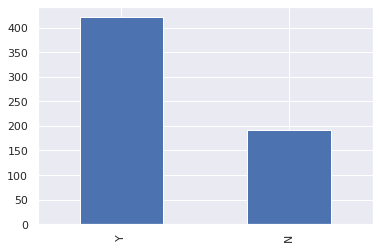

In [218]:
train['Loan_Status'].value_counts().plot.bar()#Bar plot

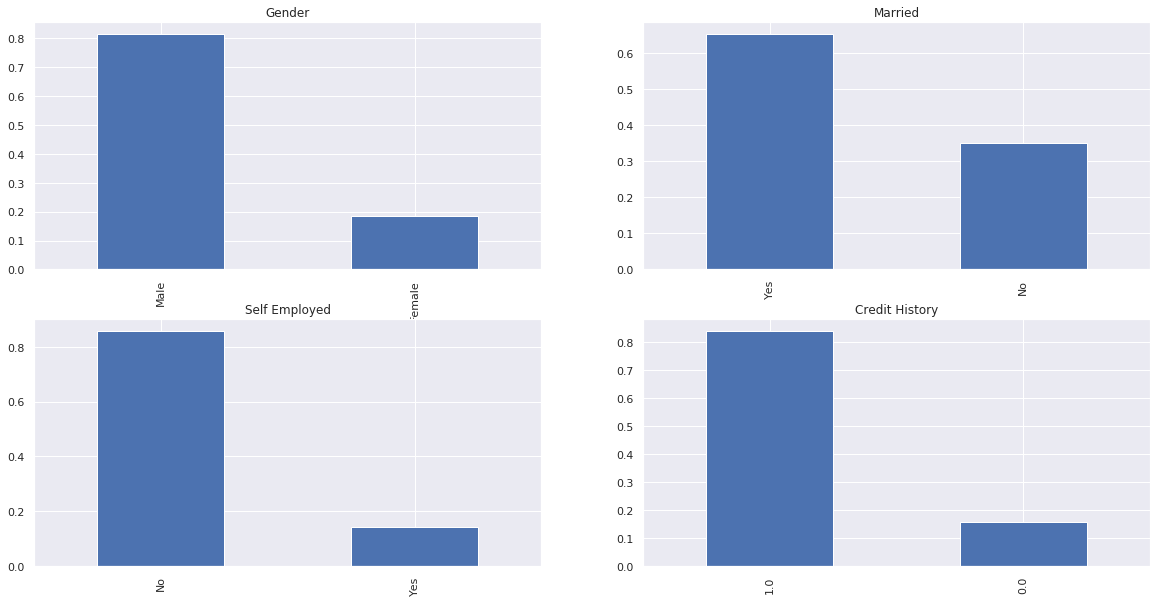

In [219]:
#Analysing frequency distribution of various categorical features
plt.subplot(2,2,1)
train['Gender'].value_counts(normalize= True).plot.bar(figsize= (20,10), title= 'Gender')
plt.subplot(2,2,2)
train['Married'].value_counts(normalize= True).plot.bar(title= 'Married')
plt.subplot(2,2,3)
train['Self_Employed'].value_counts(normalize= True).plot.bar(title= 'Self Employed')
plt.subplot(2,2,4)
train['Credit_History'].value_counts(normalize= True).plot.bar(title= 'Credit History')
plt.show()

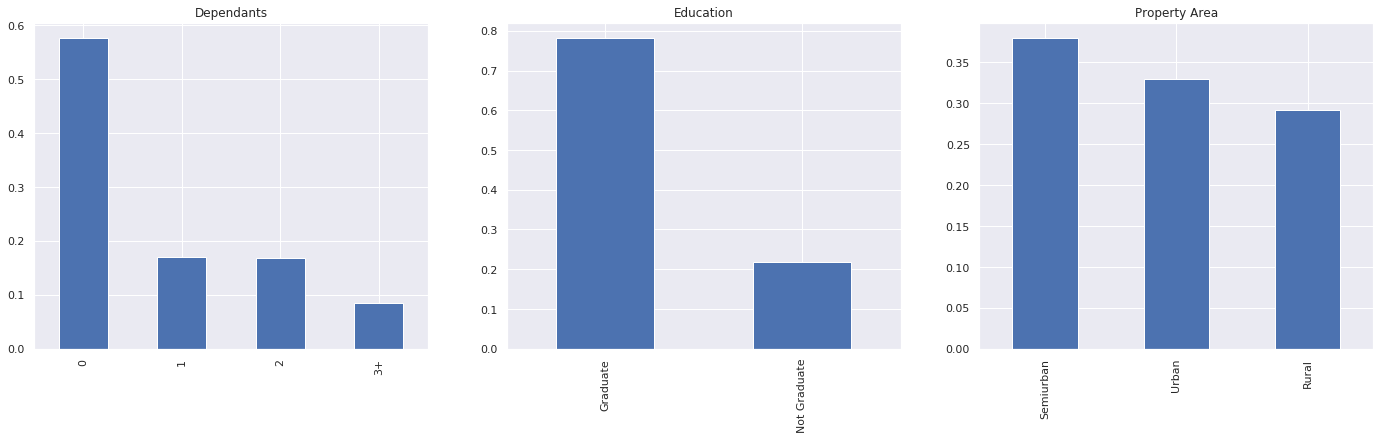

In [220]:
plt.subplot(1,3,1)
train['Dependents'].value_counts(normalize= True).plot.bar(figsize= (24,6), title= 'Dependants')
plt.subplot(1,3,2)
train['Education'].value_counts(normalize= True).plot.bar(title= 'Education')
plt.subplot(1,3,3)
train['Property_Area'].value_counts(normalize= True).plot.bar(title= 'Property Area')
plt.show()

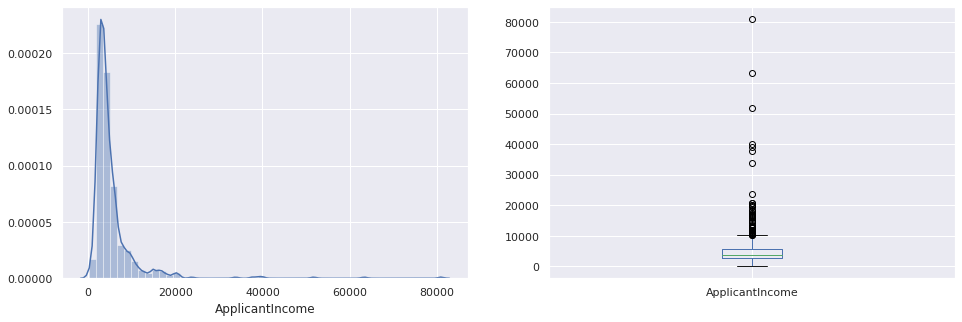

In [221]:
#Analysing distribution of ApplicantIncome
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize= (16,5))
plt.show()

Text(0.5, 0.98, '')

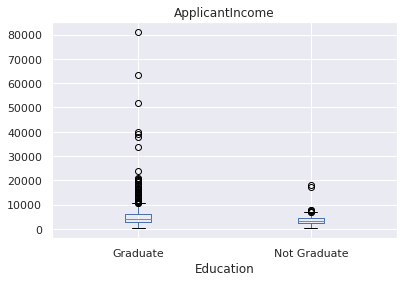

In [222]:
#Box plot of ApplicantIncome
train.boxplot(column= 'ApplicantIncome', by= 'Education')
plt.suptitle('')
#Box plot shows presence of various outliers.

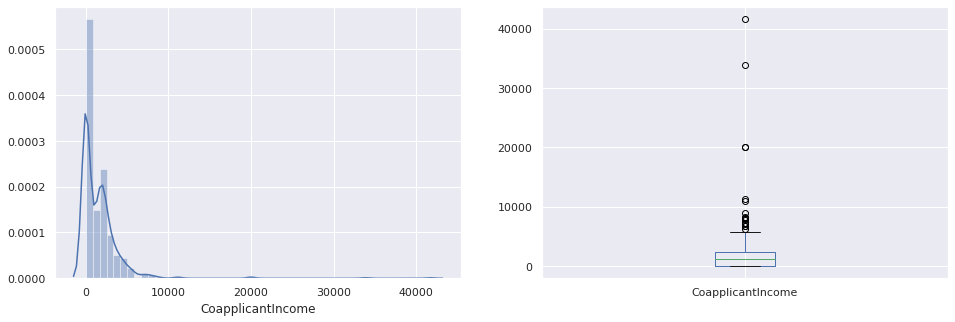

In [223]:
#Analysing distribution of CoapplicantIncome
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize= (16,5))
plt.show()

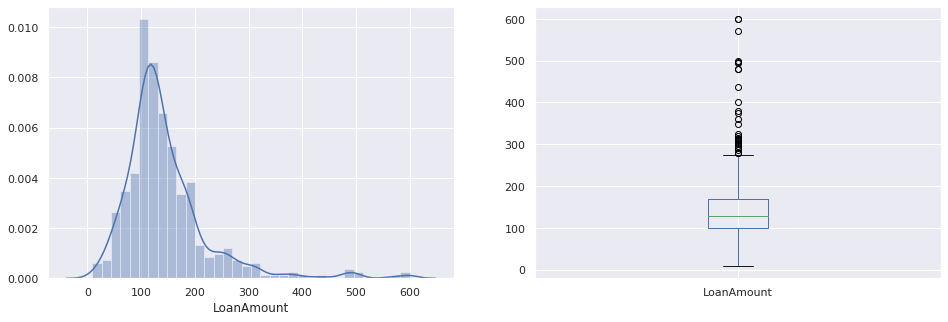

In [224]:
#Analysing distribution of LoanAmount
plt.subplot(121)
df = train.dropna()
sns.distplot(df['LoanAmount'])
plt.subplot(122)
df['LoanAmount'].plot.box(figsize= (16,5))
plt.show()

## Bivariate Analysis

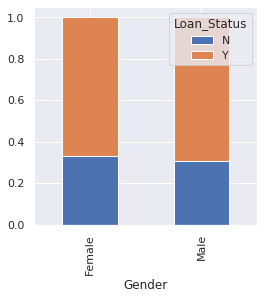

In [225]:
#Analysing Loan_Status on the basis of Gender
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis= 0).plot(kind = 'bar', stacked = True, figsize= (4,4))

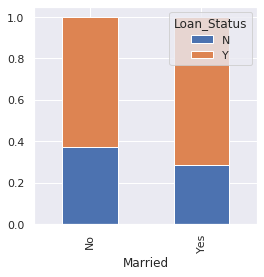

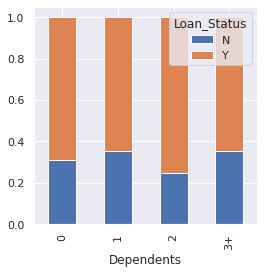

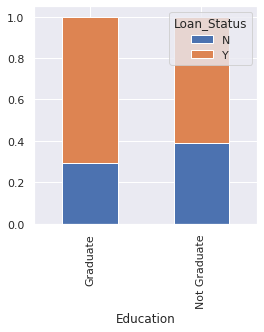

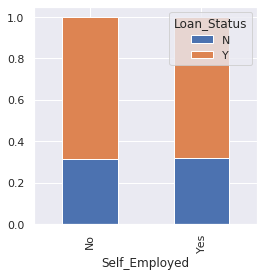

In [226]:
#Analysing other categorical variables with target variable
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependants = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
SelfEmployed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked= True, figsize= (4,4))
plt.show()
Dependants.div(Dependants.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked= True, figsize= (4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked= True, figsize= (4,4))
plt.show()
SelfEmployed.div(SelfEmployed.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked= True, figsize= (4,4))
plt.show()

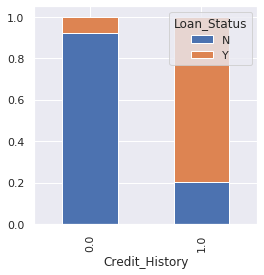

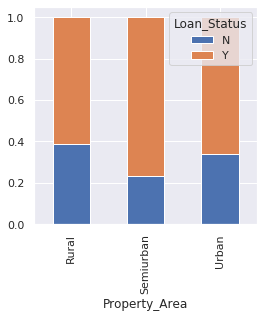

In [227]:
CreditHistory = pd.crosstab(train['Credit_History'], train['Loan_Status'])
PropertyArea = pd.crosstab(train['Property_Area'], train['Loan_Status'])
CreditHistory.div(CreditHistory.sum(1).astype(float), axis= 0).plot(kind= 'bar', stacked= True, figsize= (4,4))
plt.show()
PropertyArea.div(PropertyArea.sum(1).astype(float), axis= 0).plot(kind= 'bar', stacked= True, figsize= (4,4))
plt.show()

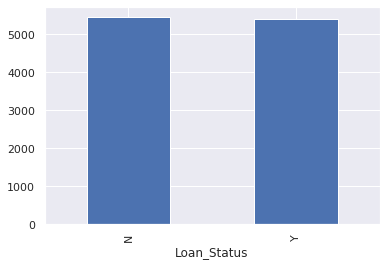

In [228]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [0]:
#Analysing numerical feature with target variable.
bins = [0,2500,4000,6000,81000]
group = ['low','average','high','very high']
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels= group)

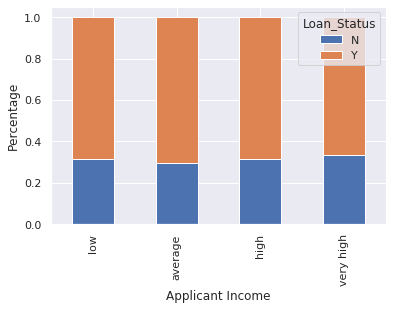

In [230]:
Incomebin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Incomebin.div(Incomebin.sum(1).astype(float), axis= 0).plot(kind= 'bar', stacked= True)
plt.xlabel('Applicant Income')
plt.ylabel('Percentage')
plt.show()

In [0]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels= group)

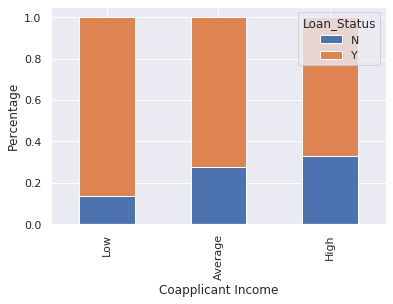

In [232]:
CoapplicantIncomeBin = pd.crosstab(train['Coapplicant_income_bin'], train['Loan_Status'])
CoapplicantIncomeBin.div(CoapplicantIncomeBin.sum(1).astype(float), axis= 0).plot(kind= 'bar', stacked= True)
plt.xlabel('Coapplicant Income')
plt.ylabel('Percentage')
plt.show()

In [0]:
train['Total Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0, 2500, 4000, 6000, 81000]
group = ['low','average','high','very high']
train['Total_income_bin'] = pd.cut(train['Total Income'], bins, labels= group)

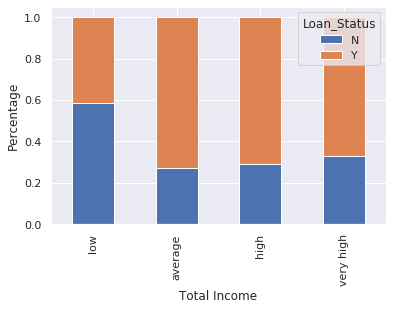

In [234]:
TotalIncomeBin = pd.crosstab(train['Total_income_bin'], train['Loan_Status'])
TotalIncomeBin.div(TotalIncomeBin.sum(1).astype(float), axis= 0).plot(kind= 'bar', stacked= True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.show()

In [0]:
bins = [0,100,200,700]
group = ['low','average','high']
train['LoanAmount_Bin'] = pd.cut(train['LoanAmount'], bins, labels= group)

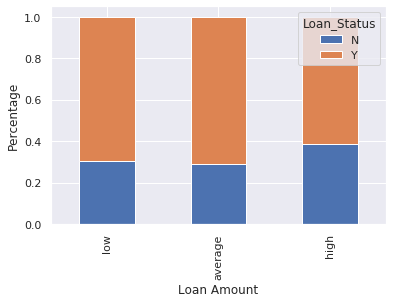

In [236]:
LoanAmountBin = pd.crosstab(train['LoanAmount_Bin'], train['Loan_Status'])
LoanAmountBin.div(LoanAmountBin.sum(1).astype(float), axis= 0).plot(kind= 'bar', stacked= 'True')
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')
plt.show()

In [237]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_income_bin', 'Total Income',
       'Total_income_bin', 'LoanAmount_Bin'],
      dtype='object')

In [0]:
#Dropping the bins which we created for exploration.
train = train.drop(['Income_bin','Coapplicant_income_bin','Total Income','Total_income_bin','LoanAmount_Bin'], axis= 1)

In [0]:
#canverting 'Dependants' feature to numeric
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)

In [0]:
#Encoding target variable
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

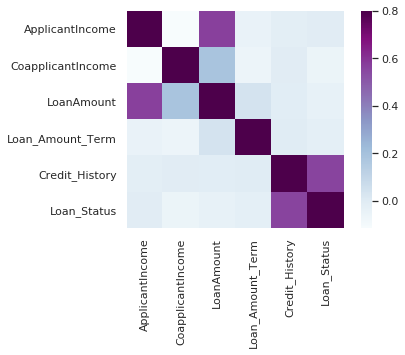

In [241]:
#analysing correlation of features with each other.
matrix = train.corr()
sns.heatmap(matrix, vmax= 0.8, square= True, cmap= 'BuPu')

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

## Missing Value and Outlier Treatment

In [242]:
#Checking for null values in individual columns.
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
#For features having few missing values, we can remove them directly.
train['Gender'].fillna(train['Gender'].mode()[0], inplace= True)
train['Married'].fillna(train['Married'].mode()[0], inplace= True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace= True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace= True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace= True)

In [244]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [0]:
#as value 360 occurs mostly, we will impute all missing values in this feature with this value.
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace= True)

In [0]:
#as LoanAmount has huge number of outliers so we will use median instead of mean
#as mean is highly affected by outliers.
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace= True)

In [247]:
#checking if anything else is left
train.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [0]:
#Performing same treatment in test data.
test['Gender'].fillna(train['Gender'].mode()[0], inplace= True)
test['Married'].fillna(train['Married'].mode()[0], inplace= True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace= True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace= True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace= True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace= True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace= True)

## Outlier Treatment

In [0]:
#Log Transformation to reduce outlier effect.
train['LoanAmount_log'] = np.log(train['LoanAmount'])

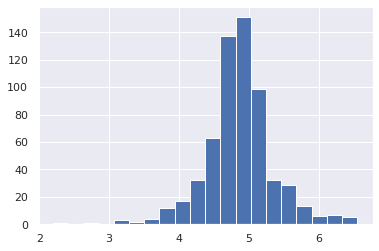

In [250]:
train['LoanAmount_log'].hist(bins= 20)

In [0]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

## Model Building

In [0]:
#LoanID do not have any effect on target variable.
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [0]:
#seperating dependant and independant variables.
X = train.drop('Loan_Status', axis= 1)
y = train['Loan_Status']

In [0]:
#One hot encode the categorical variables.
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [0]:
from sklearn.model_selection import train_test_split
#splitting training data to training and validation set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [0]:
#import logistic regression and accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [257]:
model = LogisticRegression()
model.fit(X_train, y_train)#fit the model to training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = model.predict(X_test)#make predictions with validation data

In [259]:
#Calculating accuracy of model.
accuracy_score(y_test, predictions)*100

82.70270270270271

In [0]:
predictions_test = model.predict(test)#make predictions on testing data.

In [0]:
#Preparing for submission of results.
submission = pd.read_csv('sample_submission.csv')

In [263]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [0]:
submission['Loan_Status'] = predictions_test
submission['Loan_ID'] = test_original['Loan_ID']

In [0]:
submission['Loan_Status'].replace(0, 'N', inplace= True)
submission['Loan_Status'].replace(1, 'Y', inplace= True)

In [0]:
final_submission = pd.DataFrame(submission, columns=['Loan_ID','Loan_Status'])

In [0]:
final_submission.to_csv('logistic.csv')

## Logistic Regression using Stratified K-Fold Cross Validation

In [0]:
from sklearn.model_selection import StratifiedKFold

In [269]:
i = 1
kf = StratifiedKFold(n_splits= 5, random_state=1, shuffle= True)#initialising with 5 splits
for train_index, test_index in kf.split(X, y):
    print('\n{} of K-Fold {}'.format(i,kf.n_splits))
    xtr , xvl = X.loc[train_index], X.loc[test_index]#splitting features
    ytr, yvl = y.loc[train_index], y.loc[test_index]#splitting target variable.
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)#training model
    pred_test = model.predict(xvl)#make predictions
    score = accuracy_score(yvl, pred_test)
    print('accuracy score ',score)#print accuracy_score of model
    i+=1# to keep track of number of folds
    
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


1 of K-Fold 5
accuracy score  0.8064516129032258

2 of K-Fold 5
accuracy score  0.8064516129032258

3 of K-Fold 5
accuracy score  0.8114754098360656

4 of K-Fold 5
accuracy score  0.7868852459016393

5 of K-Fold 5
accuracy score  0.8360655737704918


### Visualising ROC Curve

In [0]:
from sklearn import metrics

In [0]:
fpr, tpr, _ = metrics.roc_curve(yvl, pred)

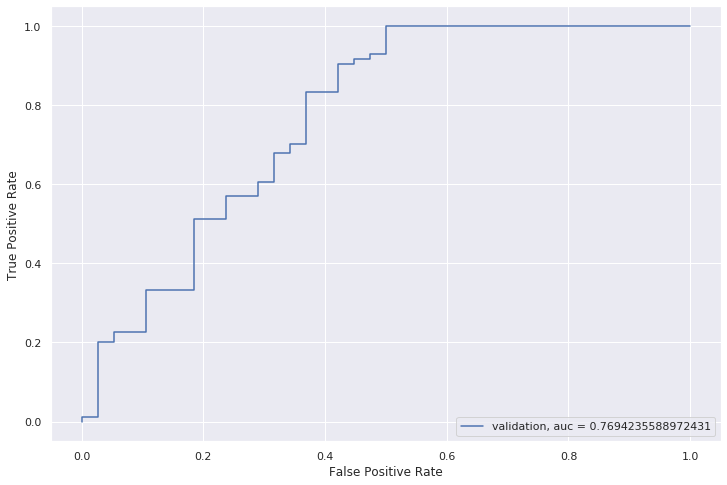

In [272]:
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label= 'validation, auc = '+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc= 4)
plt.show()

In [0]:
#preparing data for submission
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [0]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [275]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


## Feature Engineering

In [0]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

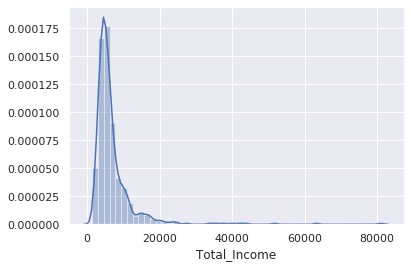

In [277]:
#plotting distribution of total income
sns.distplot(train['Total_Income'])

In [0]:
#log transformation
train['Total_Income_Log'] = np.log(train['Total_Income'])

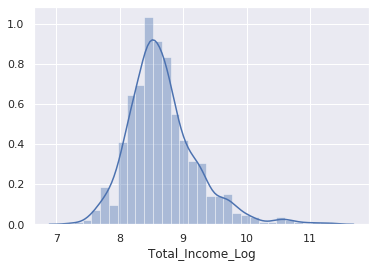

In [279]:
sns.distplot(train['Total_Income_Log'])

In [0]:
test['Total_Income_Log'] = np.log(test['Total_Income'])

In [0]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

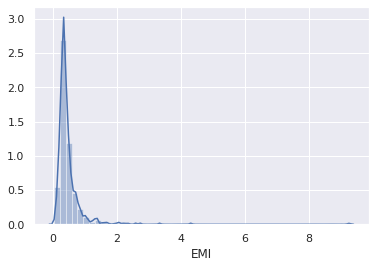

In [282]:
sns.distplot(train['EMI'])

In [0]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal.
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

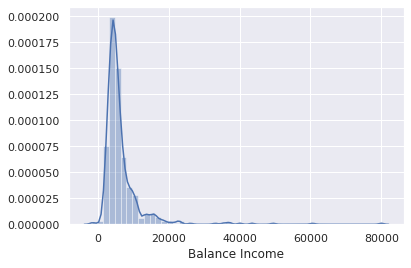

In [284]:
sns.distplot(train['Balance Income'])

In [0]:
#dropping variables which were used to create new features due to high multi-collinearity.
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Total_Income'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Total_Income'], axis=1)

## Model Building - II

In [0]:
X = train.drop('Loan_Status', axis= 1)

In [0]:
y = train['Loan_Status']

### Decision Tree

In [0]:
from sklearn import tree

In [289]:
i = 1
kf = StratifiedKFold(n_splits= 5, random_state=1, shuffle= True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of K-Fold {}'.format(i,kf.n_splits))
    xtr , xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy score ',score)
    i+=1
    pred_test = model.predict(test)


1 of K-Fold 5
accuracy score  0.7661290322580645

2 of K-Fold 5
accuracy score  0.7419354838709677

3 of K-Fold 5
accuracy score  0.6885245901639344

4 of K-Fold 5
accuracy score  0.6475409836065574

5 of K-Fold 5
accuracy score  0.7213114754098361


In [0]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [291]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,N
3,LP001035,N
4,LP001051,N


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [293]:
i = 1
kf = StratifiedKFold(n_splits= 5, random_state=1, shuffle= True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of K-Fold {}'.format(i,kf.n_splits))
    xtr , xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy score ',score)
    i+=1
    
pred_test = model.predict(test)


1 of K-Fold 5
accuracy score  0.7903225806451613

2 of K-Fold 5
accuracy score  0.782258064516129

3 of K-Fold 5
accuracy score  0.7459016393442623

4 of K-Fold 5
accuracy score  0.7622950819672131

5 of K-Fold 5
accuracy score  0.8360655737704918


In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
paramgrid = {'max_depth':list(range(1,20,2)), 'n_estimators':list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [297]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gri

In [298]:
grid_search.best_params_

{'max_depth': 3, 'n_estimators': 61}

In [299]:
i = 1
kf = StratifiedKFold(n_splits= 5, random_state=1, shuffle= True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of K-Fold {}'.format(i,kf.n_splits))
    xtr , xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators= 61)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy score ',score)
    i+=1
    
pred_test = model.predict(test) 
pred2=model.predict_proba(test)[:,1]


1 of K-Fold 5
accuracy score  0.8145161290322581

2 of K-Fold 5
accuracy score  0.8064516129032258

3 of K-Fold 5
accuracy score  0.7950819672131147

4 of K-Fold 5
accuracy score  0.8032786885245902

5 of K-Fold 5
accuracy score  0.8360655737704918


In [0]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [301]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


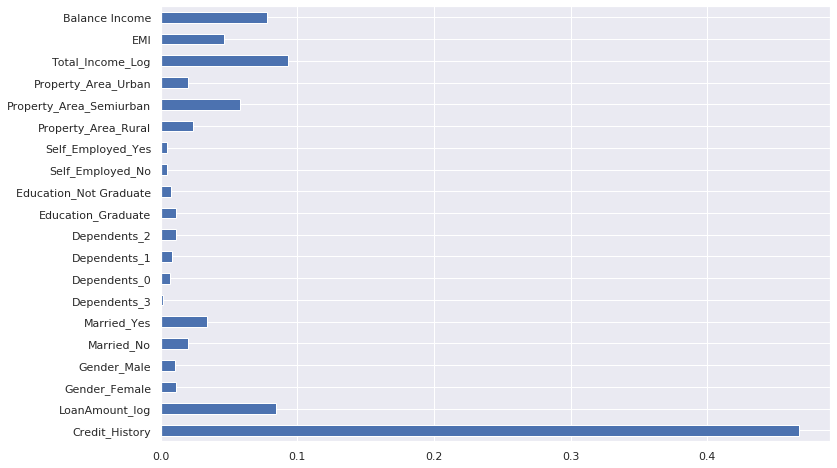

In [302]:
#Look at features imporatnces.
importances = pd.Series(model.feature_importances_, index = X.columns)
importances.plot(kind = 'barh', figsize= (12,8))

We can see that Credit_History is the most important feature followed by Balance Income, Total Income, EMI. So, feature engineering helped us in predicting our target variable.

### XGBoost

In [0]:
from xgboost import XGBClassifier

In [303]:
i = 1
kf = StratifiedKFold(n_splits= 5, random_state=1, shuffle= True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of K-Fold {}'.format(i,kf.n_splits))
    xtr , xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y.loc[train_index], y.loc[test_index]
    model = XGBClassifier(max_depth=4, n_estimators=50)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy score ',score)
    i+=1
    
pred_test = model.predict(test) 
pred3=model.predict_proba(test)[:,1]


1 of K-Fold 5
accuracy score  0.7741935483870968

2 of K-Fold 5
accuracy score  0.8064516129032258

3 of K-Fold 5
accuracy score  0.7868852459016393

4 of K-Fold 5
accuracy score  0.7868852459016393

5 of K-Fold 5
accuracy score  0.819672131147541


In [0]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [0]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [306]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
